In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import DBSCAN
from sklearn.preprocessing import StandardScaler
import gradio as gr

In [5]:
data = pd.read_csv("/content/database.csv")
data

,Date,Time,Latitude,Longitude,Type,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Type,...,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square,ID,Source,Location Source,Magnitude Source,Status
0,01/02/1965,13:44:18,19.2460,145.6160,Earthquake,131.60,NaN,NaN,6.0,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860706,ISCGEM,ISCGEM,ISCGEM,Automatic
1,01/04/1965,11:29:49,1.8630,127.3520,Earthquake,80.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860737,ISCGEM,ISCGEM,ISCGEM,Automatic
2,01/05/1965,18:05:58,-20.5790,-173.9720,Earthquake,20.00,NaN,NaN,6.2,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860762,ISCGEM,ISCGEM,ISCGEM,Automatic
3,01/08/1965,18:49:43,-59.0760,-23.5570,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860856,ISCGEM,ISCGEM,ISCGEM,Automatic
4,01/09/1965,13:32:50,11.9380,126.4270,Earthquake,15.00,NaN,NaN,5.8,MW,...,NaN,NaN,NaN,NaN,NaN,ISCGEM860890,ISCGEM,ISCGEM,ISCGEM,Automatic
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23407,12/28/2016,08:22:12,38.3917,-118.8941,Earthquake,12.30,1.2,40.0,5.6,ML,...,18.0,42.47,0.120,NaN,0.1898,NN00570710,NN,NN,NN,Reviewed
23408,12/28/2016,09:13:47,38.3777,-118.8957,Earthquake,8.80,2.0,33.0,5.5,ML,...,18.0,48.58,0.129,NaN,0.2187,NN00570744,NN,NN,NN,Reviewed
23409,12/28/2016,12:38:51,36.9179,140.4262,Earthquake,10.00,1.8,NaN,5.9,MWW,...,NaN,91.00,0.992,4.8,1.5200,US10007NAF,US,US,US,Reviewed
23410,12/29/2016,22:30:19,-9.0283,118.6639,Earthquake,79.00,1.8,NaN,6.3,MWW,...,NaN,26.00,3.553,6.0,1.4300,US10007NL0,US,US,US,Reviewed


In [6]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23412 entries, 0 to 23411
Data columns (total 21 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   Date                        23412 non-null  object 
 1   Time                        23412 non-null  object 
 2   Latitude                    23412 non-null  float64
 3   Longitude                   23412 non-null  float64
 4   Type                        23412 non-null  object 
 5   Depth                       23412 non-null  float64
 6   Depth Error                 4461 non-null   float64
 7   Depth Seismic Stations      7097 non-null   float64
 8   Magnitude                   23412 non-null  float64
 9   Magnitude Type              23409 non-null  object 
 10  Magnitude Error             327 non-null    float64
 11  Magnitude Seismic Stations  2564 non-null   float64
 12  Azimuthal Gap               7299 non-null   float64
 13  Horizontal Distance         160

In [7]:
data.describe()

,Latitude,Longitude,Depth,Depth Error,Depth Seismic Stations,Magnitude,Magnitude Error,Magnitude Seismic Stations,Azimuthal Gap,Horizontal Distance,Horizontal Error,Root Mean Square
count,23412.000000,23412.000000,23412.000000,4461.000000,7097.000000,23412.000000,327.000000,2564.000000,7299.000000,1604.000000,1156.000000,17352.000000
mean,1.679033,39.639961,70.767911,4.993115,275.364098,5.882531,0.071820,48.944618,44.163532,3.992660,7.662759,1.022784
std,30.113183,125.511959,122.651898,4.875184,162.141631,0.423066,0.051466,62.943106,32.141486,5.377262,10.430396,0.188545
min,-77.080000,-179.997000,-1.100000,0.000000,0.000000,5.500000,0.000000,0.000000,0.000000,0.004505,0.085000,0.000000
25%,-18.653000,-76.349750,14.522500,1.800000,146.000000,5.600000,0.046000,10.000000,24.100000,0.968750,5.300000,0.900000
50%,-3.568500,103.982000,33.000000,3.500000,255.000000,5.700000,0.059000,28.000000,36.000000,2.319500,6.700000,1.000000
75%,26.190750,145.026250,54.000000,6.300000,384.000000,6.000000,0.075500,66.000000,54.000000,4.724500,8.100000,1.130000
max,86.005000,179.998000,700.000000,91.295000,934.000000,9.100000,0.410000,821.000000,360.000000,37.874000,99.000000,3.440000


In [8]:
data.shape

(23412, 21)

In [9]:
data.isnull().sum()

,0
Date,0
Time,0
Latitude,0
Longitude,0
Type,0
Depth,0
Depth Error,18951
Depth Seismic Stations,16315
Magnitude,0
Magnitude Type,3


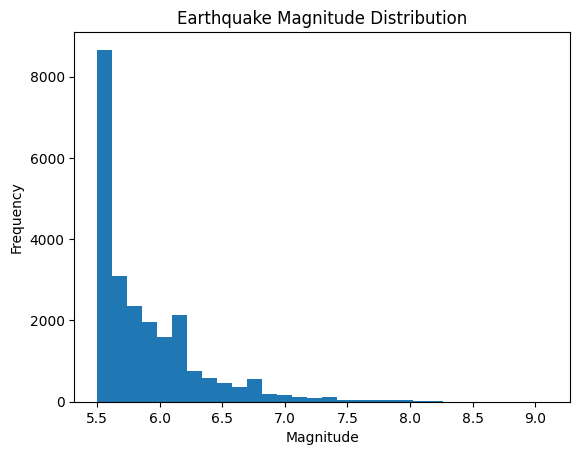

In [11]:
plt.figure()
plt.hist(data['Magnitude'], bins=30)
plt.xlabel("Magnitude")
plt.ylabel("Frequency")
plt.title("Earthquake Magnitude Distribution")
plt.show()

In [13]:
drop_cols = [
    'Depth Error',
    'Depth Seismic Stations',
    'Magnitude Error',
    'Magnitude Seismic Stations',
    'Azimuthal Gap',
    'Horizontal Distance',
    'Horizontal Error'
]

clean = data.drop(columns=drop_cols)


In [17]:
X = clean[['Latitude', 'Longitude', 'Magnitude', 'Depth']]
X

,Latitude,Longitude,Magnitude,Depth
0,19.2460,145.6160,6.0,131.60
1,1.8630,127.3520,5.8,80.00
2,-20.5790,-173.9720,6.2,20.00
3,-59.0760,-23.5570,5.8,15.00
4,11.9380,126.4270,5.8,15.00
...,...,...,...,...
23407,38.3917,-118.8941,5.6,12.30
23408,38.3777,-118.8957,5.5,8.80
23409,36.9179,140.4262,5.9,10.00
23410,-9.0283,118.6639,6.3,79.00


In [18]:
features = data[['Latitude', 'Longitude', 'Magnitude']].copy()
features.dropna(inplace=True)

In [19]:
scaler = StandardScaler()
scaled_features = scaler.fit_transform(features)

In [20]:
dbscan = DBSCAN(eps=0.8, min_samples=15)
clusters = dbscan.fit_predict(scaled_features)

features['Cluster'] = clusters

In [21]:
features['Cluster'].value_counts()

,count
Cluster,
0,23390
-1,22


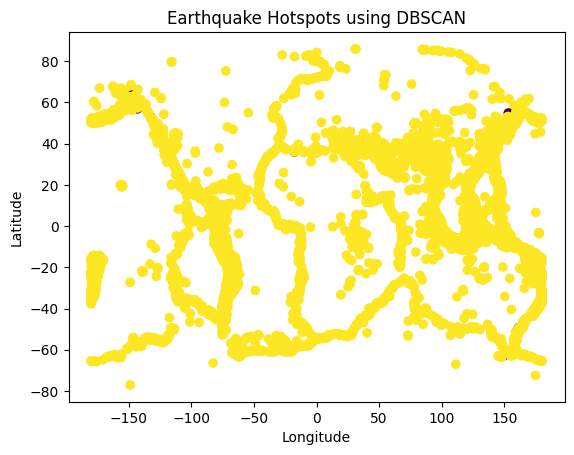

In [22]:
plt.figure()
plt.scatter(
    features['Longitude'],
    features['Latitude'],
    c=features['Cluster']
)
plt.xlabel("Longitude")
plt.ylabel("Latitude")
plt.title("Earthquake Hotspots using DBSCAN")
plt.show()

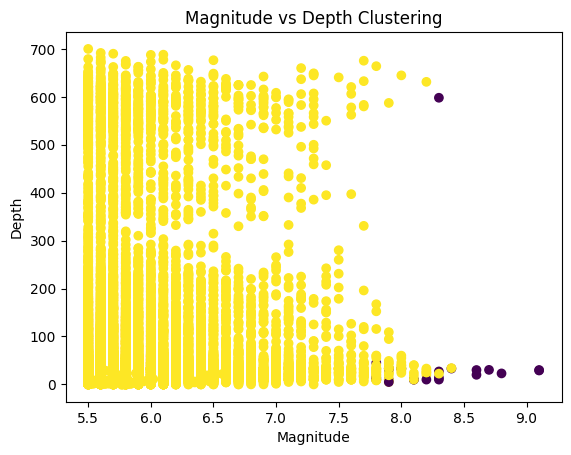

In [24]:
plt.figure()
plt.scatter(
    data.loc[features.index, 'Magnitude'],
    data.loc[features.index, 'Depth'],
    c=features['Cluster']
)
plt.xlabel("Magnitude")
plt.ylabel("Depth")
plt.title("Magnitude vs Depth Clustering")
plt.show()

In [25]:
anomalies = features[features['Cluster'] == -1]
print("Anomalous Earthquakes:", len(anomalies))

Anomalous Earthquakes: 22


In [29]:
dbscan = DBSCAN(eps=0.3, min_samples=20)
clusters = dbscan.fit_predict(scaled_features)

pd.Series(clusters).value_counts()

,count
0,22639
-1,751
1,22


In [30]:
num_clusters = len(set(clusters)) - (1 if -1 in clusters else 0)
print("Number of clusters:", num_clusters)

Number of clusters: 2


In [26]:
def earthquake_dbscan(eps, min_samples):
    dbscan = DBSCAN(eps=eps, min_samples=min_samples)
    clusters = dbscan.fit_predict(scaled_features)

    plot_df = features.copy()
    plot_df['Cluster'] = clusters

    plt.figure()
    plt.scatter(
        plot_df['Longitude'],
        plot_df['Latitude'],
        c=plot_df['Cluster']
    )
    plt.xlabel("Longitude")
    plt.ylabel("Latitude")
    plt.title("Earthquake Hotspots (DBSCAN)")
    plt.show()

    noise_count = np.sum(clusters == -1)
    cluster_count = len(set(clusters)) - (1 if -1 in clusters else 0)

    return f"Clusters Detected: {cluster_count}\nAnomalies Detected: {noise_count}"

In [27]:
interface = gr.Interface(
    fn=earthquake_dbscan,
    inputs=[
        gr.Slider(0.1, 2.0, value=0.8, step=0.1, label="EPS (Neighborhood Radius)"),
        gr.Slider(5, 50, value=15, step=1, label="Min Samples")
    ],
    outputs="text",
    title="Earthquake Hotspot Detection using DBSCAN",
    description="Adjust DBSCAN parameters to identify seismic hotspots and anomalies."
)

interface.launch()

It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3fb1df422e15215050.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
